# Исследование 

- Цель - изучить спрос пассажиров на авиабилеты в города, где проходят крупнейшие фестивали. 
- Данные: ***база данных об авиаперевозках в 2х фреймах csv.***
- Задачи: исследовать данные, показать зависимости: модели самолётов и количество рейсов, города и количества рейсов, топ 10 городов и количество рейсов, пояснить зависимости по каждому графику. 

Импортируем библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Изучение данных из файла

Открываем датафреймы и исследуем данные с помощью метода info() и describe()

In [2]:
models = pd.read_csv('https://www.dropbox.com/s/i2x19oogzilhoij/query_1.csv?dl=1')
display(models.info())
display(models.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


None

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


Тоже самое второго датафрейма:

In [3]:
cities = pd.read_csv('https://www.dropbox.com/s/9slcsx31yvffueg/query_3.csv?dl=1')
display(cities.info())
display(cities.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


None

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


### Вывод

Пропуски в данных отсутствуют. Аномалии явно прослеживаются в таблице с моделями бортов (большая разница между средним и медианным). 

Рассмотрим 10 наиболее активных направлений/отправных точек.

In [4]:
cities = cities.sort_values(by = 'average_flights', ascending = False)
cities.head(10)

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


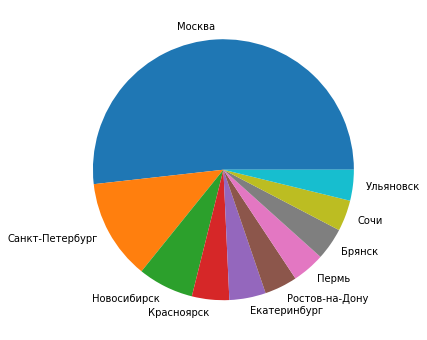

In [5]:
plt.figure(figsize=(6,6))
plt.pie(cities.average_flights.head(10), labels = cities.city.head(10))
plt.show()

Десятка аэропортов с самыми многочисленными полётами замыкается г. Ульяновск.

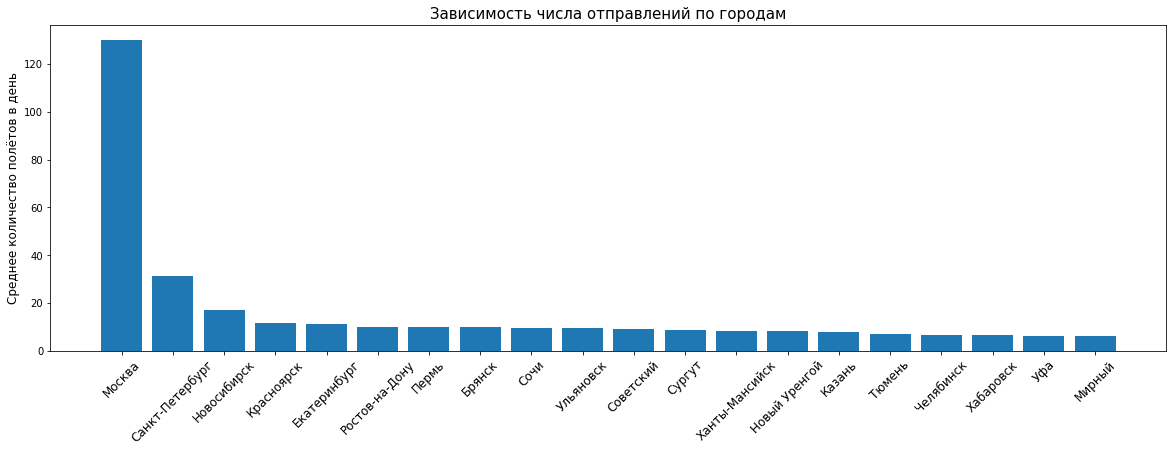

In [6]:
plt.figure(figsize=(20,6))

plt.bar(cities.city.head(20), cities.average_flights.head(20))
plt.xticks(rotation = 45,fontsize=12)
plt.title("Зависимость числа отправлений по городам", fontsize=15)
plt.ylabel('Среднее количество полётов в день',fontsize=12)
plt.show()

Данные по полётам из аэропортов различных городов предсказуемо говорят о лидерстве Москвы и СПб в количестве отправлений. Остальные города составляют незначительные величины в сравнении с этими 2мя. После Ульяновска, замыкающего десятку самых многочисленных, идёт монотонное снижение числа отправлений.

Исследование данных из файла с моделям самолётов показали подозрительно разнящиеся данные по средним и медианным величинам. Рассмотрим данные первого фрейма подробнее.

In [7]:
display(models)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


Аномальные значения 3х самолётов Bombardier CRJ-200, Cessna 208 Caravan, Sukhoi SuperJet-100 предположительно составляют годовую величину. Заменим значения на предположительную среднемесячную.

In [8]:
models.flights_amount = np.where(models.flights_amount > 1000, models.flights_amount/12, models.flights_amount )
display(models)

,model,flights_amount
0,Airbus A319-100,607.00
1,Airbus A321-200,960.00
2,Boeing 737-300,630.00
3,Boeing 767-300,600.00
4,Boeing 777-300,300.00
5,Bombardier CRJ-200,370.50
6,Cessna 208 Caravan,379.75
7,Sukhoi SuperJet-100,348.75


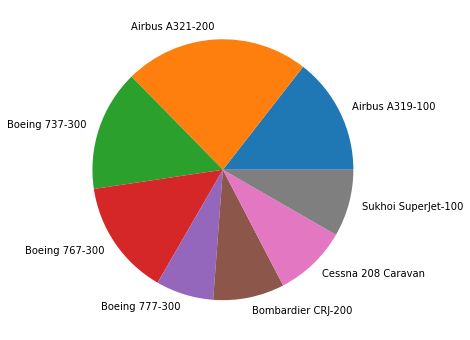

In [9]:
plt.figure(figsize=(6,6))
plt.pie(models.flights_amount, labels = models.model)
plt.show()

Как видно из графика - основные марки бортов - Boeing и Airbus

### Вывод

Анализ показал ожидаемые результаты по лидерству среднего количества рейсов в МСК и СПб. Аномалии по моделям бортов предположительно возникшие в результате ошибочного указания годовых значений заменены на среднемесячные. Борт-лидер по перевозкам - AirbusA321.

## Общий вывод

- Компания Airbus - является наиболее предпочтительной для Российских пассажиров, поскольку является лидером среди бортов по числу перелётов. 
- При этом наибольшая численность перелётов приходится на Москву и СПб. 
- Анализ недельных данных по перелётам (SQL) показал слабую зависимость недельного числа перелётов от проводимых в МСК фестов., что говорит о низкой роли авиаперевозок в целевой категории "участники Москвоских фестов" в исследуемый период.